<a href="https://colab.research.google.com/github/padmashree1995/sparks-foundation/blob/main/task2_prediction_using_unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

loading Dataframe

In [58]:
data= pd.read_csv("/content/sample_data/Iris (1).csv", index_col = 0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.columns


Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.tail

<bound method NDFrame.tail of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0  

In [ ]:
data.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3

In [ ]:
data.duplicated

<bound method DataFrame.duplicated of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9        

In [ ]:
data.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0

In [59]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
x = data.iloc[:, :4].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pd.DataFrame({"Number of Clusters":range(1,11),"WCSS":wcss})

,Number of Clusters,WCSS
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.561630
5,6,38.930963
6,7,34.190688
7,8,30.063874
8,9,27.879288
9,10,26.048202


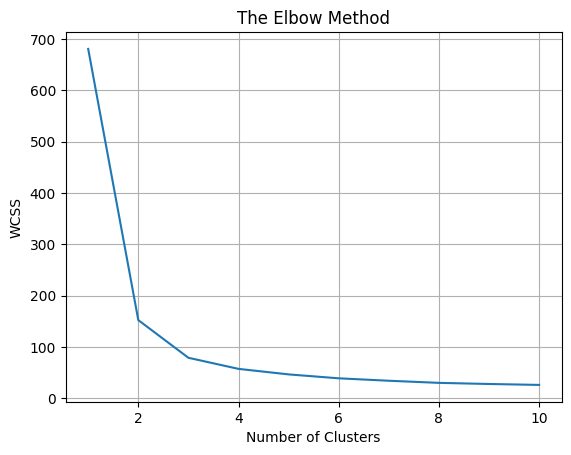

In [ ]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

visualizing the clusters into two columns

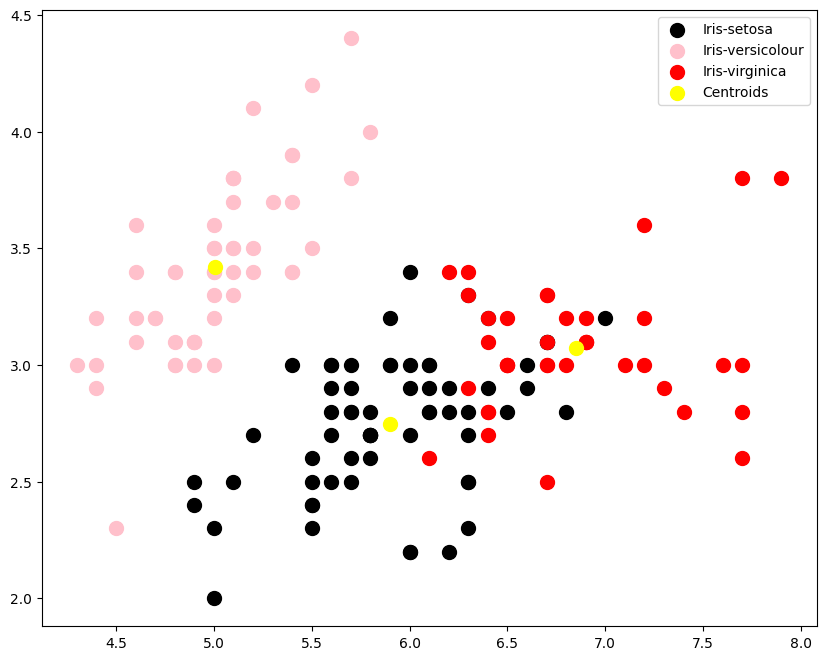

In [ ]:
plt.figure(figsize=[10,8])
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s = 100, c = "black", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'pink', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()


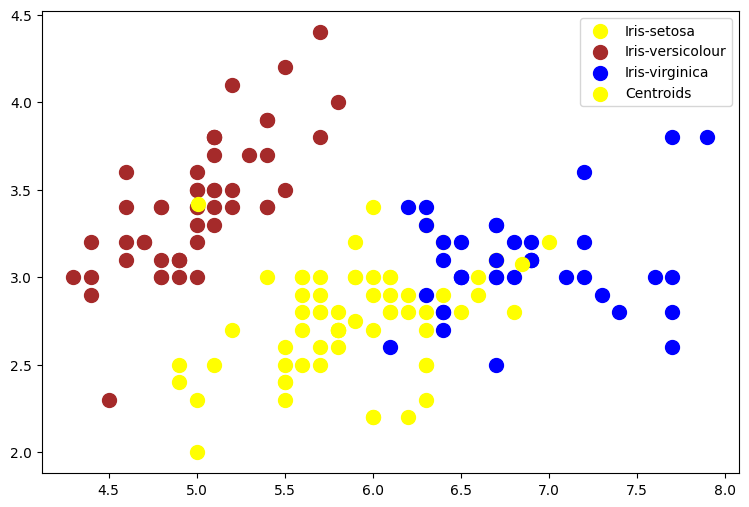

In [ ]:
plt.figure(figsize=[9,6])
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],
            s = 100, c = "yellow", label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15,12))


<Figure size 1500x1200 with 0 Axes>

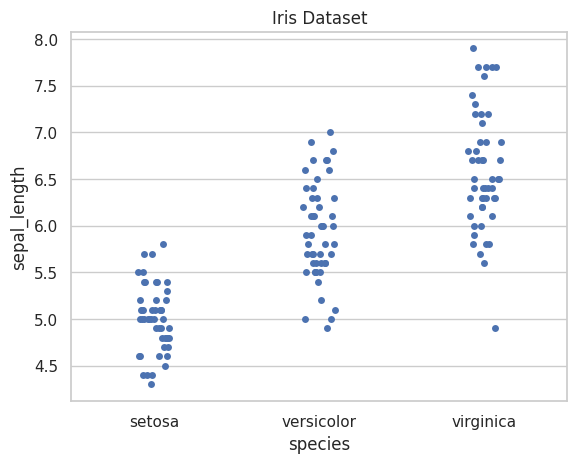

In [24]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

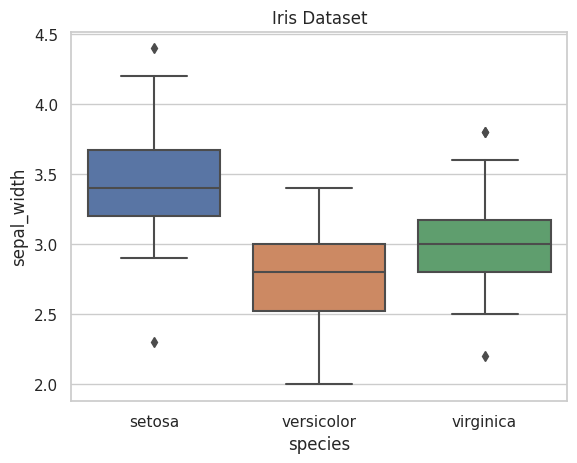

In [25]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

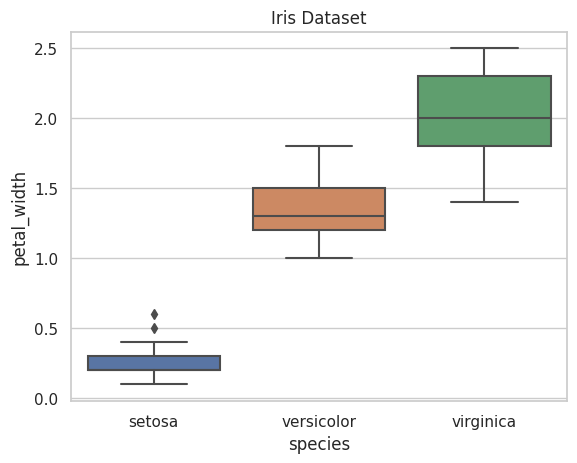

In [26]:
sns.boxplot(x='species',y='petal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

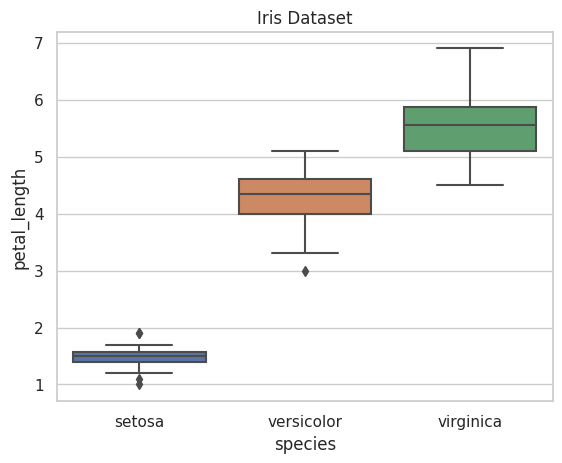

In [27]:
sns.boxplot(x='species',y='petal_length',data=iris)
plt.title("Iris Dataset")
plt.show()

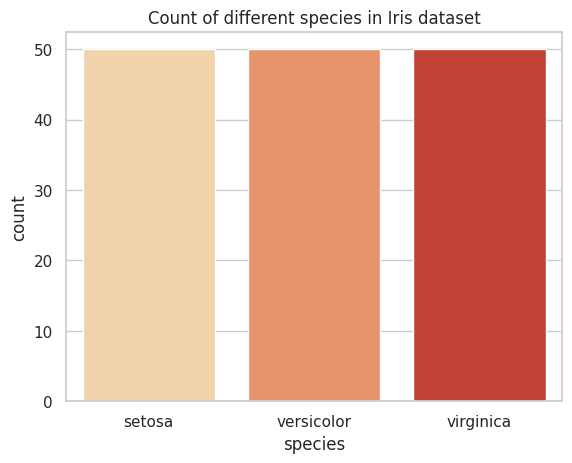

In [28]:
# Count plot
sns.countplot(x='species', data=iris, palette="OrRd")
plt.title("Count of different species in Iris dataset")
plt.show()

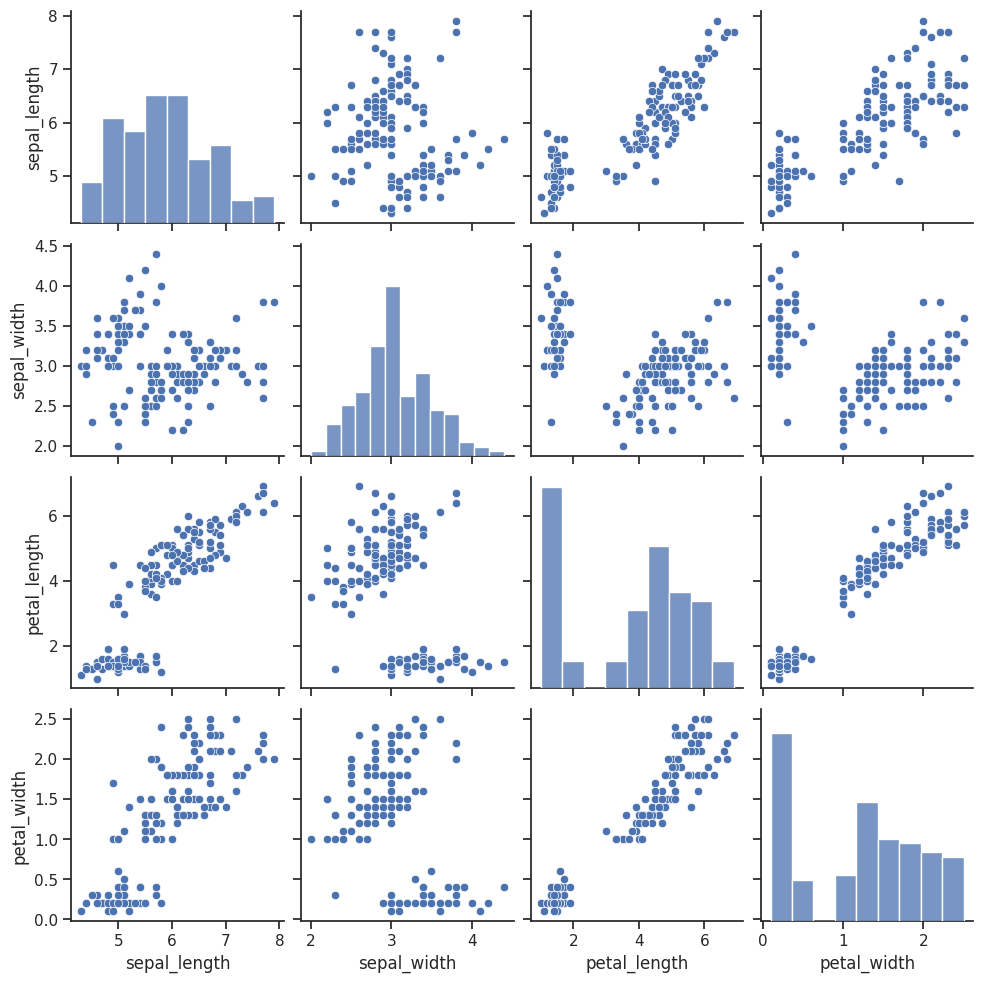

In [34]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)


import matplotlib.pyplot as plt
plt.show()